## Load data

In [1]:
import pandas as pd

train_file = 'algebra_2008_2009_train.txt'
df = pd.read_table(train_file)
print('Finish loading data.')

Finish loading data.


Output data columns and reference to proposal file, let's dive into the data.

In [2]:
df.columns

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(SubSkills)', 'Opportunity(SubSkills)',
       'KC(KTracedSkills)', 'Opportunity(KTracedSkills)', 'KC(Rules)',
       'Opportunity(Rules)'],
      dtype='object')

In [3]:
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Correct First Attempt,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules)
0,1,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R2C1,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,...,0,3,1,1,Identifying units,1,NaN,NaN,UNIT-HELP,1
1,2,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C1,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,...,1,0,0,1,Define Variable,1,NaN,NaN,VARIABLE-HELP,1
2,3,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C2,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,...,1,0,0,1,"Write expression, any form~~Using simple numbe...",1~~1~~1~~1~~1~~1,Using simple numbers-1~~Using large numbers-1~...,1~~1~~1,STANDARD-MX+B-FORMULA-HELP,1
3,4,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C1,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,...,1,1,0,1,"Entering a given~~Enter given, reading words~~...",1~~1~~1,Entering a given-1,1,GIVEN-HELP-NON-NUMERIC-PHRASE,1
4,5,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C2,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,2008-09-19 13:30:46.0,...,1,0,0,1,"Using simple numbers~~Find Y, any form~~Using ...",2~~1~~2~~1,Using simple numbers-1~~Using large numbers-1~...,2~~2~~1,CALCULATED-VALUE-HELP-MX+B-GIVEN-X-ZERO,1


In [4]:
df["Step Duration (sec)"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Step Duration (sec), dtype: float64

In [5]:
df["Correct Step Duration (sec)"].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: Correct Step Duration (sec), dtype: float64

In [6]:
df["Error Step Duration (sec)"].head()

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: Error Step Duration (sec), dtype: float64

## Feature Engineer - Process NaN or Null Values

In [7]:
pd.__version__

'0.20.1'

In [8]:
# Find columns that contains NaN value
df.isnull().any()

Row                            False
Anon Student Id                False
Problem Hierarchy              False
Problem Name                   False
Problem View                   False
Step Name                      False
Step Start Time                 True
First Transaction Time         False
Correct Transaction Time        True
Step End Time                  False
Step Duration (sec)             True
Correct Step Duration (sec)     True
Error Step Duration (sec)       True
Correct First Attempt          False
Incorrects                     False
Hints                          False
Corrects                       False
KC(SubSkills)                   True
Opportunity(SubSkills)          True
KC(KTracedSkills)               True
Opportunity(KTracedSkills)      True
KC(Rules)                       True
Opportunity(Rules)              True
dtype: bool

In [9]:
df.isnull().sum()

Row                                  0
Anon Student Id                      0
Problem Hierarchy                    0
Problem Name                         0
Problem View                         0
Step Name                            0
Step Start Time                 265516
First Transaction Time               0
Correct Transaction Time        238090
Step End Time                        0
Step Duration (sec)             442921
Correct Step Duration (sec)    1641028
Error Step Duration (sec)      7719947
Correct First Attempt                0
Incorrects                           0
Hints                                0
Corrects                             0
KC(SubSkills)                  2475917
Opportunity(SubSkills)         2475917
KC(KTracedSkills)              4498349
Opportunity(KTracedSkills)     4498349
KC(Rules)                       322051
Opportunity(Rules)              322051
dtype: int64

We are going to process with data's NaN values. But the number of records which contains NaN value is too large. We can't just drop them all.

##### Column - 'Step Start Time'
It's a time format data.

In [10]:
df['Step Start Time'] = pd.Series(pd.to_datetime(df['Step Start Time']))
print('Finish converte Step Start Time to date format.')

Finish converte Step Start Time to date format.


In [11]:
df.sort_values('Step Start Time', axis=0, ascending=True)

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Correct First Attempt,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules)
7680763,7680764,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,Numerator,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,1,0,0,1,Enter numerator of converted unit,1,NaN,NaN,UNIT-CONVERSION-FRACTION-COMPONENT-DEFAULT-HIN...,1
7680760,7680761,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,MoreOrFewer,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,1,0,0,1,Compare units,1,Compare units-1,1,UNIT-CONVERSION-RELATIVE-SIZE-GOAL-NODE-Condit...,1
7680761,7680762,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,ConversionFactorpoundsounces,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,0,1,2,1,Enter unit conversion,1,Enter unit conversion-1,1,UNIT-CONVERSION-CONVERSION-FACTOR-GOAL-NODE-Co...,1
7680762,7680763,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,SelectFractionpoundsounces,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,1,0,0,1,Select form of one with denominator of one,1,Select form of one with denominator of one-1,1,UNIT-CONVERSION-SELECT-FRACTION-GOAL-NODE-Cond...,1
7680764,7680765,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,Denominator,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,1,0,0,1,Enter denominator of converted unit,1,NaN,NaN,UNIT-CONVERSION-FRACTION-COMPONENT-DEFAULT-HIN...,2
7680765,7680766,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-030,1,FinalAnswer,2008-09-06 21:32:28,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,2008-09-06 21:32:28.0,...,1,0,0,1,Convert small number units~~Convert integer un...,1~~1~~1~~1,Convert linear units-1~~Convert integer units-1,1~~1,UNIT-CONVERSION-CONVERTED-VALUE-HINTS-FRACTION...,1
7680766,7680767,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-002,1,MoreOrFewer,2008-09-06 21:33:28,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,...,1,0,0,1,Compare units,2,Compare units-1,2,UNIT-CONVERSION-RELATIVE-SIZE-GOAL-NODE-Condit...,2
7680767,7680768,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-002,1,ConversionFactorweeksdays,2008-09-06 21:33:28,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,...,1,0,0,1,Enter unit conversion,2,Enter unit conversion-1,2,UNIT-CONVERSION-CONVERSION-FACTOR-GOAL-NODE-Co...,2
7680768,7680769,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-002,1,SelectFractionweeksdays,2008-09-06 21:33:28,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,...,1,0,0,1,Select form of one with denominator of one,2,Select form of one with denominator of one-1,2,UNIT-CONVERSION-SELECT-FRACTION-GOAL-NODE-Cond...,2
7680769,7680770,stu_b4581374fd,"Unit UNIT-CONVERSIONS-ONE-STEP, Section UNIT-C...",UNITCONVERSION1-002,1,Numerator,2008-09-06 21:33:28,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,2008-09-06 21:33:28.0,...,1,0,0,1,Enter numerator of converted unit,2,NaN,NaN,UNIT-CONVERSION-FRACTION-COMPONENT-DEFAULT-HIN...,3


In order to minimize data error， we use the very first time of date to replace NaN value in data.

In [12]:
df['Step Start Time'] = df['Step Start Time'].apply(lambda x: x if not pd.isnull(x) else pd.to_datetime('2008-09-06 21:32:28'))

In [13]:
df['Step Start Time'].isnull().sum()

0

##### Column - 'Step Duration (sec)' , 'Correct Step Duration (sec)' and 'Error Step Duration (sec)'
These columns are seconds value. It's may have little error with true value. And i suppose it doesn't mean much to final result. So we just fill NaN or Null value with 0.

In [14]:
df['Step Duration (sec)'] = df['Step Duration (sec)'].fillna(0)
df['Correct Step Duration (sec)'] = df['Correct Step Duration (sec)'].fillna(0)
df['Error Step Duration (sec)'] = df['Error Step Duration (sec)'].fillna(0)

In [15]:
df['Step Duration (sec)'].isnull().sum()

0

In [16]:
df['Correct Step Duration (sec)'].isnull().sum()

0

In [17]:
df['Error Step Duration (sec)'].isnull().sum()

0

##### Columns - 'Correct Transaction Time'
We can see when 'Corrects' equals to 0, 'Correct Transaction Time' is null. It indicates when no correct attempt then there's no Correct Transaction.

In [18]:
tmp = df[df['Correct Transaction Time'].isnull()]
print(len(tmp.index))
print(len(tmp[tmp['Corrects'] == 0].index))

238090
238090


So let's put the data 'Correct Transaction Time' to a specical value rather than null or NaN, so that our model could process it later.

In [19]:
df['Correct Transaction Time'] = df['Correct Transaction Time'].apply(lambda x: x if not pd.isnull(x) else pd.to_datetime('2008-01-01 00:00:00'))

In [20]:
tmp = df[df['Correct Transaction Time'].isnull()]
print(len(tmp.index))
print(len(tmp[tmp['Corrects'] == 0].index))

0
0


In [21]:
df['First Transaction Time'] = pd.Series(pd.to_datetime(df['First Transaction Time']))
df['Step End Time'] = pd.Series(pd.to_datetime(df['Step End Time']))

print('Finish converting time data.')

Finish converting time data.


##### What left?
So what columns are left to be processed?

In [22]:
df.isnull().sum()

Row                                  0
Anon Student Id                      0
Problem Hierarchy                    0
Problem Name                         0
Problem View                         0
Step Name                            0
Step Start Time                      0
First Transaction Time               0
Correct Transaction Time             0
Step End Time                        0
Step Duration (sec)                  0
Correct Step Duration (sec)          0
Error Step Duration (sec)            0
Correct First Attempt                0
Incorrects                           0
Hints                                0
Corrects                             0
KC(SubSkills)                  2475917
Opportunity(SubSkills)         2475917
KC(KTracedSkills)              4498349
Opportunity(KTracedSkills)     4498349
KC(Rules)                       322051
Opportunity(Rules)              322051
dtype: int64

From the statistic numbers, we can see KC(model name) and Opportunity(model name) are pairs with some NaN value count. Which means records' KC and Opportunity with same module in parentheses must have some connection or something between these records.

In [23]:
df['KC(SubSkills)'].unique()

array(['Identifying units', 'Define Variable',
       'Write expression, any form~~Using simple numbers~~Using large numbers~~Write expression, positive intercept~~Write expression, negative slope~~Write Expression, mx+b',
       ...,
       'Write expression, negative intercept~~Using small numbers~~Using difficult numbers~~Write Expression, mx+b~~Write expression, any form~~Write expression, negative slope',
       'Excluding the line when shading~~Shading less than',
       '[SkillRule: Remove constant; {ax+b=c, positive; ax+b=c, negative; x+a=b, positive; x+a=b, negative; [var expr]+[const expr]=[const expr], positive; [var expr]+[const expr]=[const expr], negative; [var expr]+[const expr]=[const expr], all; Combine constants to right; Combine constants to left; a-x=b, positive; a/x+b=c, positive; a/x+b=c, negative}]~~[SkillRule: Isolate variable term in linear equation; {[var expr]+[const expr]=[const expr], positive; [var expr]+[const expr]=[const expr], negative; [var expr]+[con

In [24]:
df['Opportunity(SubSkills)'].unique()

array(['1', '1~~1~~1~~1~~1~~1', '1~~1~~1', ..., '186~~439~~374',
       '430~~426~~113', '187~~440~~375'], dtype=object)

In [25]:
df['KC(KTracedSkills)'].unique()

array([nan,
       'Using simple numbers-1~~Using large numbers-1~~Write expression, negative slope-1',
       'Entering a given-1',
       'Using simple numbers-1~~Using large numbers-1~~Find Y, negative slope-1',
       'Compare units-1', 'Enter unit conversion-1',
       'Select form of one with numerator of one-1',
       'Convert linear units-1~~Convert integer units-1',
       'Select form of one with denominator of one-1',
       'Convert linear units-1~~Convert decimal units less than one-1',
       'Convert integer units-1~~Convert volume units-1',
       'Convert linear units-1~~Convert decimal units greater than one-1',
       'Convert integer units-1~~Convert area units-1',
       'Convert decimal units less than one-1~~Convert linear units-1',
       'Convert volume units-1~~Convert decimal units greater than one-1',
       'Identifying units-1',
       'Using small numbers-1~~Using simple numbers-1~~Write expression, positive slope-1',
       'Using small numbers-1~~Using

In [26]:
df['Opportunity(KTracedSkills)'].unique()

array([nan, '1~~1~~1', '1', ..., '59~~94', '62~~97', '6~~91'], dtype=object)

In [27]:
df['KC(Rules)'].unique()

array(['UNIT-HELP', 'VARIABLE-HELP', 'STANDARD-MX+B-FORMULA-HELP', ...,
       '[Rule: MT no fraction coeff ([SolverOperation mt],)]~~[Rule: manipulate wrong side (null,{constant side expression})]~~[Rule: MT no fraction coeff (null,right)]~~[Rule: rf before mt ([SolverOperation rf],null)]',
       '[Rule: RF left, move neg. to numerator ([SolverOperation rf],{components with property canReduceFractionsNoMultWhole of left})]~~[Rule: multiply negative coeff ([SolverOperation multiply],{negative of reciprocal of coefficient of item 1 of variable terms of variable side expression})]',
       '[Rule: ax+b=cx+d, pos ([SolverOperation subtract],{item 1 of variable terms of left side})]~~[Rule: add positive term ([SolverOperation add],{item 1 of constant terms of variable side expression})]'], dtype=object)

In [28]:
df['Opportunity(Rules)'].unique()

array(['1', '2', '3', ..., '9~~104', '10~~106', '55~~3~~1~~1'], dtype=object)

In [29]:
df['Opportunity(Rules)'] = df['Opportunity(Rules)'].fillna(1)
df['Opportunity(KTracedSkills)'] = df['Opportunity(KTracedSkills)'].fillna(1)
df['Opportunity(SubSkills)'] = df['Opportunity(SubSkills)'].fillna(1)

# Fill NaN value with special value
df['KC(Rules)'] = df['KC(Rules)'].fillna("COMMON")
df['KC(KTracedSkills)'] = df['KC(KTracedSkills)'].fillna("COMMON")
df['KC(SubSkills)'] = df['KC(SubSkills)'].fillna("COMMON")

In [30]:
df.isnull().sum()

Row                            0
Anon Student Id                0
Problem Hierarchy              0
Problem Name                   0
Problem View                   0
Step Name                      0
Step Start Time                0
First Transaction Time         0
Correct Transaction Time       0
Step End Time                  0
Step Duration (sec)            0
Correct Step Duration (sec)    0
Error Step Duration (sec)      0
Correct First Attempt          0
Incorrects                     0
Hints                          0
Corrects                       0
KC(SubSkills)                  0
Opportunity(SubSkills)         0
KC(KTracedSkills)              0
Opportunity(KTracedSkills)     0
KC(Rules)                      0
Opportunity(Rules)             0
dtype: int64

## Feature Engineer - CFAR

In [31]:
tmpdf = df.groupby(['Anon Student Id','Correct First Attempt'], as_index=False).count()

In [32]:
tmpdf.head()

,Anon Student Id,Correct First Attempt,Row,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,...,Error Step Duration (sec),Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules)
0,stu_000d56dbbb,0,789,789,789,789,789,789,789,789,...,789,789,789,789,789,789,789,789,789,789
1,stu_000d56dbbb,1,5395,5395,5395,5395,5395,5395,5395,5395,...,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395
2,stu_0018382601,0,1089,1089,1089,1089,1089,1089,1089,1089,...,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089
3,stu_0018382601,1,4624,4624,4624,4624,4624,4624,4624,4624,...,4624,4624,4624,4624,4624,4624,4624,4624,4624,4624
4,stu_002821e04e,0,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [33]:
tmpdf = tmpdf.loc[:, ['Anon Student Id','Correct First Attempt', 'Row']]
tmpdf.head()

,Anon Student Id,Correct First Attempt,Row
0,stu_000d56dbbb,0,789
1,stu_000d56dbbb,1,5395
2,stu_0018382601,0,1089
3,stu_0018382601,1,4624
4,stu_002821e04e,0,33


In [34]:
tmpdf2 = df.groupby(['Anon Student Id'], as_index=False).count()
tmpdf2 = tmpdf2.loc[:, ['Anon Student Id', 'Row']]
tmpdf2.head()

,Anon Student Id,Row
0,stu_000d56dbbb,6184
1,stu_0018382601,5713
2,stu_002821e04e,212
3,stu_003f10a343,2035
4,stu_004a3f900a,1213


In [35]:
tmpdf = tmpdf.merge(tmpdf2, left_on=['Anon Student Id'], right_on=['Anon Student Id'], how='left')
tmpdf.head()

,Anon Student Id,Correct First Attempt,Row_x,Row_y
0,stu_000d56dbbb,0,789,6184
1,stu_000d56dbbb,1,5395,6184
2,stu_0018382601,0,1089,5713
3,stu_0018382601,1,4624,5713
4,stu_002821e04e,0,33,212


In [36]:
tmpdf = tmpdf[tmpdf['Correct First Attempt'] == 1]
tmpdf.head()

,Anon Student Id,Correct First Attempt,Row_x,Row_y
1,stu_000d56dbbb,1,5395,6184
3,stu_0018382601,1,4624,5713
5,stu_002821e04e,1,179,212
7,stu_003f10a343,1,1712,2035
9,stu_004a3f900a,1,1012,1213


In [37]:
# Row_x is students' total correct count
# Row_y is students' total attempt count
tmpdf['CFAR'] = tmpdf['Row_x'] / tmpdf['Row_y']
tmpdf.head()

,Anon Student Id,Correct First Attempt,Row_x,Row_y,CFAR
1,stu_000d56dbbb,1,5395,6184,0.872413
3,stu_0018382601,1,4624,5713,0.809382
5,stu_002821e04e,1,179,212,0.844340
7,stu_003f10a343,1,1712,2035,0.841278
9,stu_004a3f900a,1,1012,1213,0.834295


Put CFAR back to original data frame

In [38]:
tmpdf = tmpdf.loc[:, ['Anon Student Id', 'CFAR']]
df = df.merge(tmpdf, left_on=['Anon Student Id'], right_on=['Anon Student Id'], how='left')
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR
0,1,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R2C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,3,1,1,Identifying units,1,COMMON,1,UNIT-HELP,1,0.889209
1,2,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,Define Variable,1,COMMON,1,VARIABLE-HELP,1,0.889209
2,3,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C2,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,"Write expression, any form~~Using simple numbe...",1~~1~~1~~1~~1~~1,Using simple numbers-1~~Using large numbers-1~...,1~~1~~1,STANDARD-MX+B-FORMULA-HELP,1,0.889209
3,4,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,1,0,1,"Entering a given~~Enter given, reading words~~...",1~~1~~1,Entering a given-1,1,GIVEN-HELP-NON-NUMERIC-PHRASE,1,0.889209
4,5,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C2,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,"Using simple numbers~~Find Y, any form~~Using ...",2~~1~~2~~1,Using simple numbers-1~~Using large numbers-1~...,2~~2~~1,CALCULATED-VALUE-HELP-MX+B-GIVEN-X-ZERO,1,0.889209


In [39]:
# For the purpose of saving memory 
del tmpdf
del tmpdf2

Now we can see CFAR has been put into original data.

In [40]:
df['Opportunity(SubSkills)'].unique()

array(['1', '1~~1~~1~~1~~1~~1', '1~~1~~1', ..., '186~~439~~374',
       '430~~426~~113', '187~~440~~375'], dtype=object)

In [41]:
df['Opportunity(KTracedSkills)'].unique()

array([1, '1~~1~~1', '1', ..., '59~~94', '62~~97', '6~~91'], dtype=object)

In [42]:
df['Opportunity(Rules)'].unique()

array(['1', '2', '3', ..., '9~~104', '10~~106', '55~~3~~1~~1'], dtype=object)

In [43]:
df.to_hdf('train_data.hdf','data',mode='w') 

print("Save data to hdf file.")

/Users/michaelfeng/anaconda2/envs/py3k/lib/python3.6/site-packages/pandas/core/generic.py:1282: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['Anon Student Id', 'Problem Hierarchy', 'Problem Name', 'Step Name', 'Correct Transaction Time', 'KC(SubSkills)', 'Opportunity(SubSkills)', 'KC(KTracedSkills)', 'Opportunity(KTracedSkills)', 'KC(Rules)', 'Opportunity(Rules)']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Save data to hdf file.


### Check point

In [1]:
import pandas as pd
df = pd.read_hdf('train_data.hdf','data')
print('Finish load data.')

Finish load data.


## Feature Engineer - One-hot encoding

In [2]:
# In order to decreace data's memory usage, we need to do a little process
df['Opportunity(SubSkills)'] = df['Opportunity(SubSkills)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))
df['Opportunity(KTracedSkills)'] = df['Opportunity(KTracedSkills)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))
df['Opportunity(Rules)'] = df['Opportunity(Rules)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))
df['KC(SubSkills)'] = df['KC(SubSkills)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))
df['KC(KTracedSkills)'] = df['KC(KTracedSkills)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))
df['KC(Rules)'] = df['KC(Rules)'].apply(lambda x: x if "~" not in str(x) else x.replace('~~','~'))

In [3]:
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR
0,1,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R2C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,3,1,1,Identifying units,1,COMMON,1,UNIT-HELP,1,0.889209
1,2,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,Define Variable,1,COMMON,1,VARIABLE-HELP,1,0.889209
2,3,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R3C2,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,"Write expression, any form~Using simple number...",1~1~1~1~1~1,Using simple numbers-1~Using large numbers-1~W...,1~1~1,STANDARD-MX+B-FORMULA-HELP,1,0.889209
3,4,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,1,0,1,"Entering a given~Enter given, reading words~En...",1~1~1,Entering a given-1,1,GIVEN-HELP-NON-NUMERIC-PHRASE,1,0.889209
4,5,stu_de2777346f,"Unit CTA1_01, Section CTA1_01-3",REAL20B,1,R4C2,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46.0,2008-09-19 13:30:46,...,0,0,1,"Using simple numbers~Find Y, any form~Using la...",2~1~2~1,Using simple numbers-1~Using large numbers-1~F...,2~2~1,CALCULATED-VALUE-HELP-MX+B-GIVEN-X-ZERO,1,0.889209


- One-hot encoding: Anon Student Id

In [4]:
id_df = df['Anon Student Id'].unique()
id_df

array(['stu_de2777346f', 'stu_b08a3605ac', 'stu_f3cd0a315f', ...,
       'stu_e2e1cce3c4', 'stu_244b6a9fdd', 'stu_6af5d5e304'], dtype=object)

In [5]:
len(id_df)

3310

In [6]:
id_dict = dict(enumerate(id_df))

In [7]:
id_dict = {v: k for k, v in id_dict.items()}

In [8]:
id_dict

{'stu_de2777346f': 0,
 'stu_b08a3605ac': 1,
 'stu_f3cd0a315f': 2,
 'stu_cfb96da1cc': 3,
 'stu_e24aa8c101': 4,
 'stu_29de16cb51': 5,
 'stu_3da864f9c7': 6,
 'stu_7a4c314585': 7,
 'stu_b082c157c5': 8,
 'stu_948dbd21fd': 9,
 'stu_d40421e984': 10,
 'stu_d69d4f04e0': 11,
 'stu_470623952c': 12,
 'stu_e41db96ccd': 13,
 'stu_a20a6551e5': 14,
 'stu_c0c538f7e8': 15,
 'stu_3045559e59': 16,
 'stu_0142fbb2a7': 17,
 'stu_636f6e1ba4': 18,
 'stu_7c87107804': 19,
 'stu_e2a459ce90': 20,
 'stu_d3f3938302': 21,
 'stu_8099339ed4': 22,
 'stu_7453edd269': 23,
 'stu_e0cfbb5f61': 24,
 'stu_7a0fc0aab3': 25,
 'stu_1346115f12': 26,
 'stu_94b8f9bc86': 27,
 'stu_dde85a3a6a': 28,
 'stu_79061638bf': 29,
 'stu_ffb64665c3': 30,
 'stu_cfe8cd60cd': 31,
 'stu_befce87cd1': 32,
 'stu_8857af329a': 33,
 'stu_c9bd49579c': 34,
 'stu_41b3ea9077': 35,
 'stu_1e5b9da97f': 36,
 'stu_af364eb7cb': 37,
 'stu_e9983c110d': 38,
 'stu_4be4c74a63': 39,
 'stu_6be73bc2c2': 40,
 'stu_5e8ffe11c0': 41,
 'stu_129353eed5': 42,
 'stu_c84b293e94': 43

In [9]:
import pickle

with open('stu_id_dict.pickle', 'wb') as handle:
    pickle.dump(id_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save student id dict.')

Finish save student id dict.


In [10]:
df['Anon Student Id'] = df['Anon Student Id'].apply(lambda x: id_dict[x] if x in id_dict else -1)
print('Finish one-hot encoding Anon Student Id.')

Finish one-hot encoding Anon Student Id.


- One-hot encoding: Problem Hierarchy

In [11]:
pro_hier_dict = df['Problem Hierarchy'].unique()
pro_hier_dict = dict(enumerate(pro_hier_dict))
pro_hier_dict = {v: k for k, v in pro_hier_dict.items()}

with open('pro_hier_dict.pickle', 'wb') as handle:
    pickle.dump(pro_hier_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Problem Hierarchy dict.')

Finish save Problem Hierarchy dict.


In [12]:
df['Problem Hierarchy'] = df['Problem Hierarchy'].apply(lambda x: pro_hier_dict[x] if x in pro_hier_dict else -1)
print('Finish one-hot encoding Problem Hierarchy.')

Finish one-hot encoding Problem Hierarchy.


- One-hot encoding: Problem Name

In [13]:
pro_name_dict = df['Problem Name'].unique()
pro_name_dict = dict(enumerate(pro_name_dict))
pro_name_dict = {v: k for k, v in pro_name_dict.items()}

with open('pro_name_dict.pickle', 'wb') as handle:
    pickle.dump(pro_name_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Problem Name dict.')

df['Problem Name'] = df['Problem Name'].apply(lambda x: pro_name_dict[x] if x in pro_name_dict else -1)
print('Finish one-hot encoding Problem Name.')

Finish save Problem Name dict.
Finish one-hot encoding Problem Name.


- One-hot encoding: Step Name

In [14]:
step_name_dict = df['Step Name'].unique()
step_name_dict = dict(enumerate(step_name_dict))
step_name_dict = {v: k for k, v in step_name_dict.items()}

with open('step_name_dict.pickle', 'wb') as handle:
    pickle.dump(step_name_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Step Name dict.')

df['Step Name'] = df['Step Name'].apply(lambda x: step_name_dict[x] if x in step_name_dict else -1)
print('Finish one-hot encoding Step Name.')

Finish save Step Name dict.
Finish one-hot encoding Step Name.


- One-hot encoding: KC(SubSkills)

In [15]:
kc_sub_dict = df['KC(SubSkills)'].unique()
kc_sub_dict = dict(enumerate(kc_sub_dict))
kc_sub_dict = {v: k for k, v in kc_sub_dict.items()}

with open('kc_sub_dict.pickle', 'wb') as handle:
    pickle.dump(kc_sub_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save KC(SubSkills) dict.')

df['KC(SubSkills)'] = df['KC(SubSkills)'].apply(lambda x: kc_sub_dict[x] if x in kc_sub_dict else -1)
print('Finish one-hot encoding KC(SubSkills).')

Finish save KC(SubSkills) dict.
Finish one-hot encoding KC(SubSkills).


- One-hot encoding: KC(KTracedSkills)

In [16]:
kc_ktrace_dict = df['KC(KTracedSkills)'].unique()
kc_ktrace_dict = dict(enumerate(kc_ktrace_dict))
kc_ktrace_dict = {v: k for k, v in kc_ktrace_dict.items()}

with open('kc_ktrace_dict.pickle', 'wb') as handle:
    pickle.dump(kc_ktrace_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save KC(KTracedSkills) dict.')

df['KC(KTracedSkills)'] = df['KC(KTracedSkills)'].apply(lambda x: kc_ktrace_dict[x] if x in kc_ktrace_dict else -1)
print('Finish one-hot encoding KC(KTracedSkills).')

Finish save KC(KTracedSkills) dict.
Finish one-hot encoding KC(KTracedSkills).


- One-hot encoding: KC(Rules)

In [17]:
kc_rule_dict = df['KC(Rules)'].unique()
kc_rule_dict = dict(enumerate(kc_rule_dict))
kc_rule_dict = {v: k for k, v in kc_rule_dict.items()}

with open('kc_rule_dict.pickle', 'wb') as handle:
    pickle.dump(kc_rule_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save KC(Rules) dict.')

df['KC(Rules)'] = df['KC(Rules)'].apply(lambda x: kc_rule_dict[x] if x in kc_rule_dict else -1)
print('Finish one-hot encoding KC(Rules).')

Finish save KC(Rules) dict.
Finish one-hot encoding KC(Rules).


- One-hot encoding: Opportunity(SubSkills)

In [18]:
opt_sub_dict = df['Opportunity(SubSkills)'].unique()
opt_sub_dict = dict(enumerate(opt_sub_dict))
opt_sub_dict = {v: k for k, v in opt_sub_dict.items()}

with open('opt_sub_dict.pickle', 'wb') as handle:
    pickle.dump(opt_sub_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Opportunity(SubSkills) dict.')

df['Opportunity(SubSkills)'] = df['Opportunity(SubSkills)'].apply(lambda x: opt_sub_dict[x] if x in opt_sub_dict else -1)
print('Finish one-hot encoding Opportunity(SubSkills).')

Finish save Opportunity(SubSkills) dict.
Finish one-hot encoding Opportunity(SubSkills).


- One-hot encoding: Opportunity(KTracedSkills)

In [19]:
opt_ktrace_dict = df['Opportunity(KTracedSkills)'].unique()
opt_ktrace_dict = dict(enumerate(opt_ktrace_dict))
opt_ktrace_dict = {v: k for k, v in opt_ktrace_dict.items()}

with open('opt_ktrace_dict.pickle', 'wb') as handle:
    pickle.dump(opt_ktrace_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Opportunity(KTracedSkills) dict.')

df['Opportunity(KTracedSkills)'] = df['Opportunity(KTracedSkills)'].apply(lambda x: opt_ktrace_dict[x] if x in opt_ktrace_dict else -1)
print('Finish one-hot encoding Opportunity(KTracedSkills).')

Finish save Opportunity(KTracedSkills) dict.
Finish one-hot encoding Opportunity(KTracedSkills).


- One-hot encoding: Opportunity(Rules)

In [20]:
opt_rule_dict = df['Opportunity(Rules)'].unique()
opt_rule_dict = dict(enumerate(opt_rule_dict))
opt_rule_dict = {v: k for k, v in opt_rule_dict.items()}

with open('opt_rule_dict.pickle', 'wb') as handle:
    pickle.dump(opt_rule_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
print('Finish save Opportunity(Rules) dict.')

df['Opportunity(Rules)'] = df['Opportunity(Rules)'].apply(lambda x: opt_rule_dict[x] if x in opt_rule_dict else -1)
print('Finish one-hot encoding Opportunity(Rules).')

Finish save Opportunity(Rules) dict.
Finish one-hot encoding Opportunity(Rules).


## Feature Engineer - Clustering

- Try KMeans clustering

In [26]:
df['Correct Transaction Time'] = df['Correct Transaction Time'].apply(lambda x: str(x)[:-2] if ".0" in str(x) else str(x))
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR
0,1,0,0,0,1,0,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,...,3,1,1,0,0,0,0,0,0,0.889209
1,2,0,0,0,1,1,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,...,0,0,1,1,0,0,0,1,0,0.889209
2,3,0,0,0,1,2,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,...,0,0,1,2,1,1,1,2,0,0.889209
3,4,0,0,0,1,3,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,...,1,0,1,3,2,2,2,3,0,0.889209
4,5,0,0,0,1,4,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,2008-09-19 13:30:46,...,0,0,1,4,3,3,3,4,0,0.889209


In [27]:
df['Correct Transaction Time'] = pd.Series(pd.to_datetime(df['Correct Transaction Time']))

We suppose these data records are in the same year, same month and same day.

In [28]:
df['year']  = df['Correct Transaction Time'].dt.year
df['month']  = df['Correct Transaction Time'].dt.month
df['day']  = df['Correct Transaction Time'].dt.day

In [29]:
df['Step Start Time'] = df['Step Start Time'].dt.hour * 3600 + df['Step Start Time'].dt.minute * 60 + df['Step Start Time'].dt.second

In [30]:
df['First Transaction Time'] = df['First Transaction Time'].dt.hour * 3600 + df['First Transaction Time'].dt.minute * 60 + df['First Transaction Time'].dt.second

In [31]:
df['Correct Transaction Time'] = df['Correct Transaction Time'].dt.hour * 3600 + df['Correct Transaction Time'].dt.minute * 60 + df['Correct Transaction Time'].dt.second

In [32]:
df['Step End Time'] = df['Step End Time'].dt.hour * 3600 + df['Step End Time'].dt.minute * 60 + df['Step End Time'].dt.second

In [33]:
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR,year,month,day
0,1,0,0,0,1,0,48646,48646,48646,48646,...,0,0,0,0,0,0,0.889209,2008,9,19
1,2,0,0,0,1,1,48646,48646,48646,48646,...,1,0,0,0,1,0,0.889209,2008,9,19
2,3,0,0,0,1,2,48646,48646,48646,48646,...,2,1,1,1,2,0,0.889209,2008,9,19
3,4,0,0,0,1,3,48646,48646,48646,48646,...,3,2,2,2,3,0,0.889209,2008,9,19
4,5,0,0,0,1,4,48646,48646,48646,48646,...,4,3,3,3,4,0,0.889209,2008,9,19


In [34]:
df.isnull().any()

Row                            False
Anon Student Id                False
Problem Hierarchy              False
Problem Name                   False
Problem View                   False
Step Name                      False
Step Start Time                False
First Transaction Time         False
Correct Transaction Time       False
Step End Time                  False
Step Duration (sec)            False
Correct Step Duration (sec)    False
Error Step Duration (sec)      False
Correct First Attempt          False
Incorrects                     False
Hints                          False
Corrects                       False
KC(SubSkills)                  False
Opportunity(SubSkills)         False
KC(KTracedSkills)              False
Opportunity(KTracedSkills)     False
KC(Rules)                      False
Opportunity(Rules)             False
CFAR                           False
year                           False
month                          False
day                            False
d

In [35]:
df.isnull().sum()

Row                            0
Anon Student Id                0
Problem Hierarchy              0
Problem Name                   0
Problem View                   0
Step Name                      0
Step Start Time                0
First Transaction Time         0
Correct Transaction Time       0
Step End Time                  0
Step Duration (sec)            0
Correct Step Duration (sec)    0
Error Step Duration (sec)      0
Correct First Attempt          0
Incorrects                     0
Hints                          0
Corrects                       0
KC(SubSkills)                  0
Opportunity(SubSkills)         0
KC(KTracedSkills)              0
Opportunity(KTracedSkills)     0
KC(Rules)                      0
Opportunity(Rules)             0
CFAR                           0
year                           0
month                          0
day                            0
dtype: int64

In [36]:
df['CFAR'] = df['CFAR'].fillna(0.5)

In [37]:
df.dtypes

Row                              int64
Anon Student Id                  int64
Problem Hierarchy                int64
Problem Name                     int64
Problem View                     int64
Step Name                        int64
Step Start Time                  int64
First Transaction Time           int64
Correct Transaction Time         int64
Step End Time                    int64
Step Duration (sec)            float64
Correct Step Duration (sec)    float64
Error Step Duration (sec)      float64
Correct First Attempt            int64
Incorrects                       int64
Hints                            int64
Corrects                         int64
KC(SubSkills)                    int64
Opportunity(SubSkills)           int64
KC(KTracedSkills)                int64
Opportunity(KTracedSkills)       int64
KC(Rules)                        int64
Opportunity(Rules)               int64
CFAR                           float64
year                             int64
month                    

In [38]:
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR,year,month,day
0,1,0,0,0,1,0,48646,48646,48646,48646,...,0,0,0,0,0,0,0.889209,2008,9,19
1,2,0,0,0,1,1,48646,48646,48646,48646,...,1,0,0,0,1,0,0.889209,2008,9,19
2,3,0,0,0,1,2,48646,48646,48646,48646,...,2,1,1,1,2,0,0.889209,2008,9,19
3,4,0,0,0,1,3,48646,48646,48646,48646,...,3,2,2,2,3,0,0.889209,2008,9,19
4,5,0,0,0,1,4,48646,48646,48646,48646,...,4,3,3,3,4,0,0.889209,2008,9,19


### Check Point - final processed data.

In [ ]:
df.to_hdf('train_data_final.hdf','data',mode='w') 

print("Save final data to hdf file.")

In [1]:
import pandas as pd
df = pd.read_hdf('train_data_final.hdf','data')
print('Finish load final data.')

Finish load final data.


In [2]:
df.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,KC(SubSkills),Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR,year,month,day
0,1,0,0,0,1,0,48646,48646,48646,48646,...,0,0,0,0,0,0,0.889209,2008,9,19
1,2,0,0,0,1,1,48646,48646,48646,48646,...,1,0,0,0,1,0,0.889209,2008,9,19
2,3,0,0,0,1,2,48646,48646,48646,48646,...,2,1,1,1,2,0,0.889209,2008,9,19
3,4,0,0,0,1,3,48646,48646,48646,48646,...,3,2,2,2,3,0,0.889209,2008,9,19
4,5,0,0,0,1,4,48646,48646,48646,48646,...,4,3,3,3,4,0,0.889209,2008,9,19


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import time

start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=32).fit(df)

preds = kmeans.predict(df)
# Cause memory error rised, so remove this step
#score = silhouette_score(df, preds)
#print(score)
print("%s seconds." % (time.time() - start_time))

223.66637182235718 seconds.


In [4]:
preds.shape

(8918054,)

In [5]:
df2 = pd.DataFrame(data=preds,columns=['group'])

In [6]:
df2.head()

,group
0,1
1,1
2,1
3,1
4,1


In [7]:
data = pd.concat([df, df2], axis=1, join_axes=[df.index])

In [8]:
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR,year,month,day,group
0,1,0,0,0,1,0,48646,48646,48646,48646,...,0,0,0,0,0,0.889209,2008,9,19,1
1,2,0,0,0,1,1,48646,48646,48646,48646,...,0,0,0,1,0,0.889209,2008,9,19,1
2,3,0,0,0,1,2,48646,48646,48646,48646,...,1,1,1,2,0,0.889209,2008,9,19,1
3,4,0,0,0,1,3,48646,48646,48646,48646,...,2,2,2,3,0,0.889209,2008,9,19,1
4,5,0,0,0,1,4,48646,48646,48646,48646,...,3,3,3,4,0,0.889209,2008,9,19,1


## Data and Model

In [9]:
y = data['Correct First Attempt']

In [10]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Correct First Attempt, dtype: int64

In [11]:
del data['Correct First Attempt']
X = data

In [12]:
X.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,...,Opportunity(SubSkills),KC(KTracedSkills),Opportunity(KTracedSkills),KC(Rules),Opportunity(Rules),CFAR,year,month,day,group
0,1,0,0,0,1,0,48646,48646,48646,48646,...,0,0,0,0,0,0.889209,2008,9,19,1
1,2,0,0,0,1,1,48646,48646,48646,48646,...,0,0,0,1,0,0.889209,2008,9,19,1
2,3,0,0,0,1,2,48646,48646,48646,48646,...,1,1,1,2,0,0.889209,2008,9,19,1
3,4,0,0,0,1,3,48646,48646,48646,48646,...,2,2,2,3,0,0.889209,2008,9,19,1
4,5,0,0,0,1,4,48646,48646,48646,48646,...,3,3,3,4,0,0.889209,2008,9,19,1


In [ ]:
import pandas as pd

In [89]:
tmp = data[['Anon Student Id','CFAR']]

In [90]:
tmp.head()

,Anon Student Id,CFAR
0,0,0.889209
1,0,0.889209
2,0,0.889209
3,0,0.889209
4,0,0.889209


In [96]:
tmp2 = tmp.drop_duplicates()

In [113]:
tmp2.head()

,Anon Student Id,CFAR
0,0,0.889209
8322,1,0.620215
19007,2,0.786406
23965,3,0.867142
30551,4,0.768844


In [114]:
type(tmp2)

pandas.core.frame.DataFrame

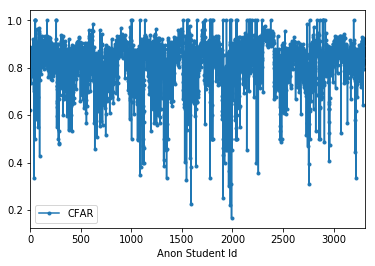

In [116]:
tmp2[['Anon Student Id','CFAR']].plot(x='Anon Student Id',y='CFAR',marker='.').figure

### Data Correlation 

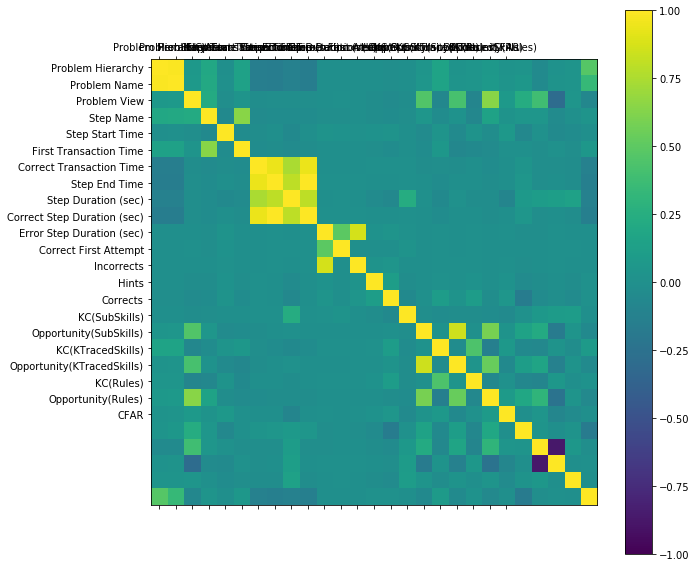

In [129]:
import matplotlib.pyplot as plt
import pandas
import numpy

names = ['Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(SubSkills)', 'Opportunity(SubSkills)',
       'KC(KTracedSkills)', 'Opportunity(KTracedSkills)', 'KC(Rules)',
       'Opportunity(Rules)', 'CFAR']
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [130]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [131]:
# Use lightGBM algorithm, Code example
from pylightgbm.models import GBMClassifier
from sklearn import datasets, metrics, model_selection
from sklearn import cross_validation, metrics  

exec_p = "/Users/michaelfeng/code/LightGBM/lightgbm"

/Users/michaelfeng/anaconda2/envs/py3k/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [132]:
import time

start_time = time.time()

clf = GBMClassifier(exec_path=exec_p,max_bin=255,learning_rate=0.1,boosting_type='dart',
                   num_iterations=200, early_stopping_round=10,num_threads=4,
                   num_leaves=40, min_data_in_leaf=10)
clf.fit(X_train, y_train, test_data=[(X_val, y_val)])
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Log Loss: ", metrics.log_loss(y_test, y_pred))
print("%s seconds." % (time.time() - start_time))

pyLightGBM is looking for 'LIGHTGBM_EXEC' environment variable, cannot be found.
exec_path will be deprecated in favor of environment variable
[LightGBM] [Info] Finished loading parameters
[LightGBM] [Info] Finished loading data in 18.910273 seconds
[LightGBM] [Info] Number of positive: 4872964, number of negative: 834590
[LightGBM] [Info] Total Bins 4383
[LightGBM] [Info] Number of data: 5707554, number of used features: 27
[LightGBM] [Info] Finished initializing training
[LightGBM] [Info] Started training...
[LightGBM] [Info] Trained a tree with leaves=40 and max_depth=13
[LightGBM] [Info] Iteration:1, valid_1 binary_logloss : 0.611214
[LightGBM] [Info] 0.302380 seconds elapsed, finished iteration 1
[LightGBM] [Info] Trained a tree with leaves=40 and max_depth=15
[LightGBM] [Info] Iteration:2, valid_1 binary_logloss : 0.544131
[LightGBM] [Info] 0.619836 seconds elapsed, finished iteration 2
[LightGBM] [Info] Trained a tree with leaves=40 and max_depth=14
[LightGBM] [Info] Iteration:3

Parameter turning method could be found at [Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

From the output of the LightGBM algorithm, we can see the algorithm return the following results:
- the binary logloss for validation data set: 0.102615
- Accuracy:  0.947368007934
- the Log Loss for all test data set:  1.81784608905

Fair enough.

## Benchmark

In [135]:
from sklearn import neighbors

start_time = time.time()

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(
    n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Log Loss: ", metrics.log_loss(y_test, y_pred))
print("%s seconds." % (time.time() - start_time))

Accuracy:  0.872375759064
Log Loss:  4.40807422533
263.4964282512665 seconds.


## Summary

Confusion matrix, without normalization
[[ 256851    3310]
 [  90565 1432885]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.06  0.94]]


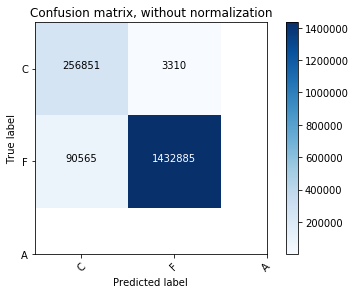

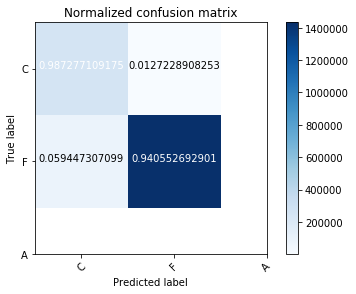

In [134]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = 'CFA'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The above confusion matrix is our LightGBM's model performance. It shows the quality of the output of LightGBM classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Confusion matrix, without normalization
[[  61400  198761]
 [  28871 1494579]]
Normalized confusion matrix
[[ 0.24  0.76]
 [ 0.02  0.98]]


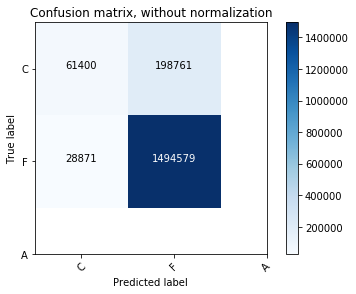

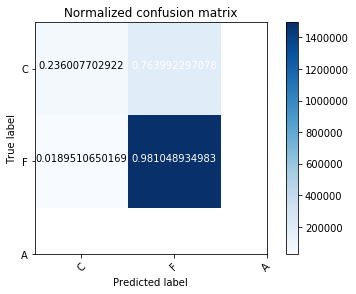

In [137]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The above confusion matrix is our benchmark model performance. It shows the quality of the output of benchmark classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

From the comparison between benchmark model and our designed model, we can see our designed model works great than the benchmark model. 

Our model and result can be optimized in many different ways, such as:
- Separate KC and Opportunity column modules which separated by '~~' to multi columns
- Fill 'CFAR' columns' NaN data with other options, for e.g., 0
- Other classification algorithms
- Use GridSearchCV to tuning hyper-parameter
- etc.

Some of the methods have been waived because the limitation of my laptop's memory. 
But it's still a good experiment.